In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

**Reading in the Data with and seperating the features from the output. The step is to calculate the number of Malignant and Benign output labels.**

In [63]:
wdbc = pd.read_csv('wdbc.data')
features = wdbc.columns
pp = pprint.PrettyPrinter(indent=1)
print("Features List: ")
pp.pprint(features)
print("\n")
# saving the output values in output_labels, seperately
output_labels = wdbc.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = wdbc.drop(list,axis = 1 )
x.head()

Benign, Malignant = output_labels.value_counts()
print("Benign: ",Benign)
print("Malignant : ",Malignant)

Features List: 
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Benign:  357
Malignant :  212


**Once, we see the various features, focus shifts to the distribution of Malignant and Benign in the dataset. To visualize that a pie_chart is generated**

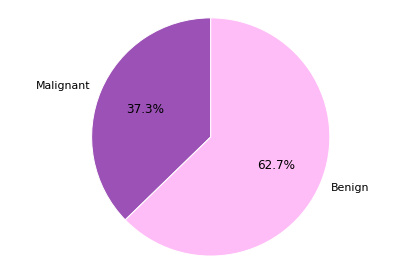

In [64]:
def pie_chart():
    names = ['Malignant', 'Benign']
    sizes = [Malignant, Benign]
    colors = ['#9C51B6', '#ffbdf7']
    fig, ax = plt.subplots()
    patches, texts, autotexts = ax.pie(sizes, colors = colors, labels=names, autopct='%1.1f%%', startangle=90)
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.axis('equal')  
    plt.tight_layout()
    plt.show()

pie_chart()

**The following are the data visualizations, 10 features at a time to better be able to see patterns.**

Features
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


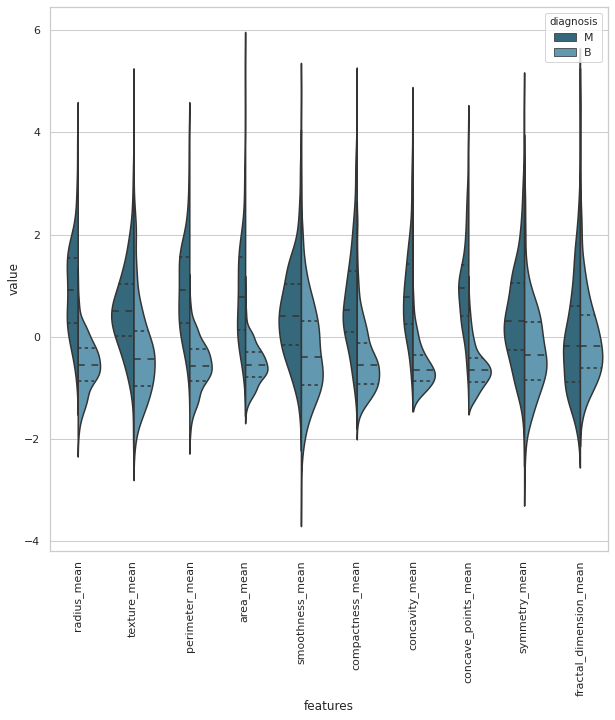

In [74]:
data_dia = output_labels
wdbc = x
standard_wdbc = (wdbc - wdbc.mean()) / (wdbc.std())
wdbc = pd.concat([output_labels,standard_wdbc.iloc[:,0:10]],axis=1)

def violin_plot(wdbc):
  wdbc = pd.melt(wdbc,id_vars="diagnosis", var_name="features", value_name='value')
  plt.figure(figsize=(10,10))
  sns.violinplot(x="features", y="value", hue="diagnosis", data=wdbc,split=True, inner="quart", palette="PuBuGn_d")
  plt.xticks(rotation=90) 

violin_plot(wdbc)
print("Features")
pp.pprint(wdbc.columns)

Features
Index(['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


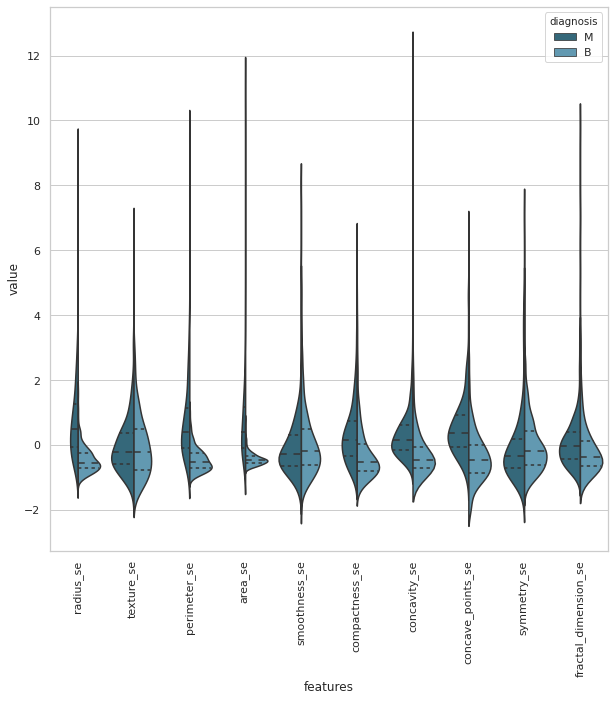

In [76]:
wdbc = pd.concat([output_labels,standard_wdbc.iloc[:,10:20]],axis=1)
violin_plot(wdbc)
print("Features")
pp.pprint(wdbc.columns)

Features
Index(['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


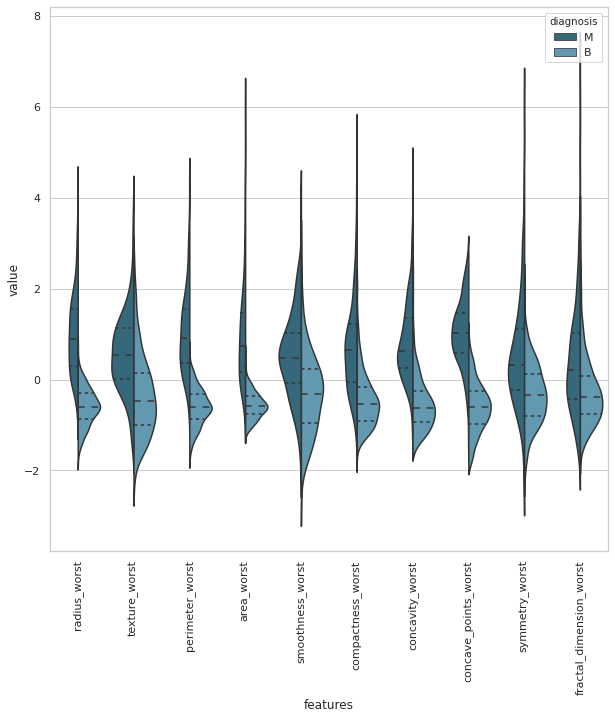

In [77]:
wdbc = pd.concat([output_labels,standard_wdbc.iloc[:,20:31]],axis=1)
violin_plot(wdbc)
print("Features")
pp.pprint(wdbc.columns)

**Next, the swarm plot if used to observe the seperation of Malignant and Benign output labels in the data, again 10 features at a time.**

Features
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


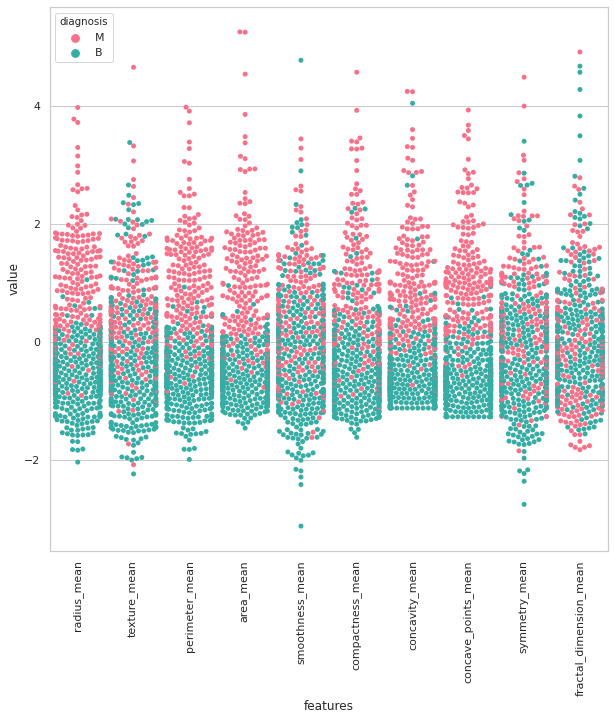

In [79]:
sns.set(style="whitegrid", palette="muted")
data_dia = output_labels
wdbc = x
standard_wdbc = (wdbc - wdbc.mean()) / (wdbc.std())
dataset = pd.concat([output_labels,standard_wdbc.iloc[:,0:10]],axis=1)

#Swarm Plot
def swarm_plot(dataset):
  dataset = pd.melt(dataset,id_vars="diagnosis", var_name="features", value_name='value')
  plt.figure(figsize=(10,10))
  sns.swarmplot(x="features", y="value", hue="diagnosis", data=dataset, palette="husl")
  plt.xticks(rotation=90)

swarm_plot(dataset)
print("Features")
pp.pprint(dataset.columns)

Features
Index(['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


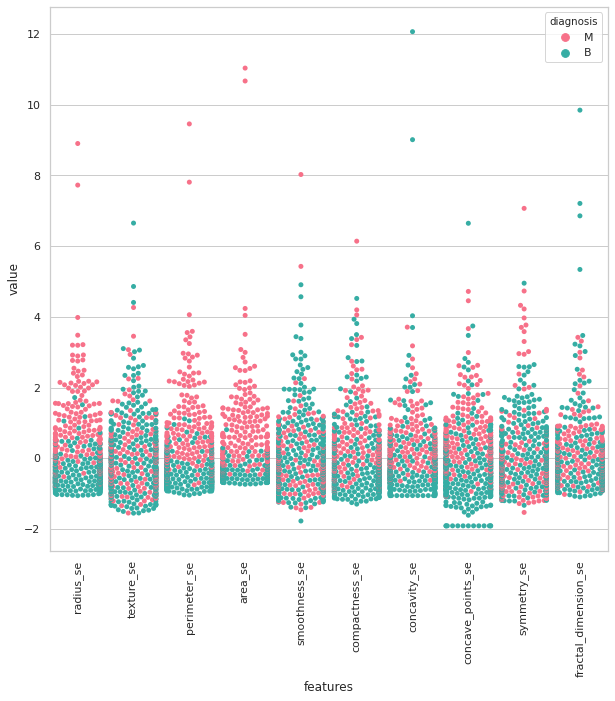

In [80]:
dataset = pd.concat([output_labels,standard_wdbc.iloc[:,10:20]],axis=1)
swarm_plot(dataset)
print("Features")
pp.pprint(dataset.columns)

Features
Index(['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


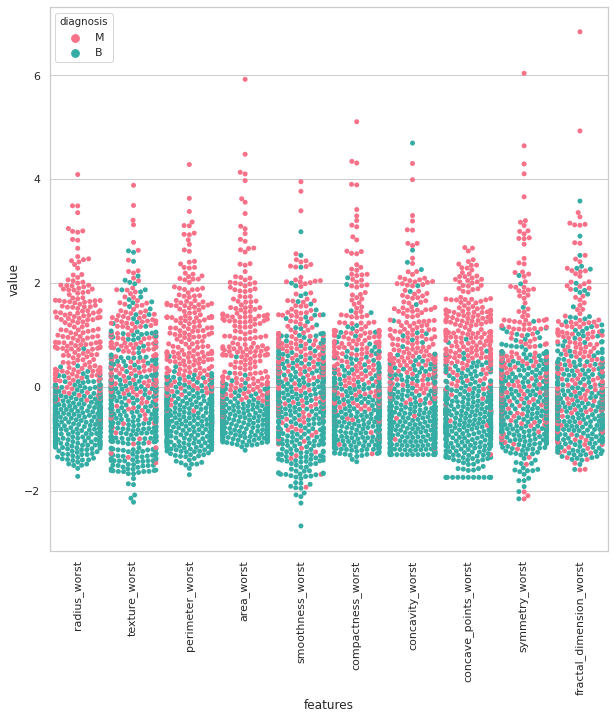

In [81]:
dataset = pd.concat([output_labels,standard_wdbc.iloc[:,20:31]],axis=1)
swarm_plot(dataset)
print("Features")
pp.pprint(dataset.columns)